In [103]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
data = pd.read_excel("C:/7-clustering/EastWestAirlines.xlsx")


In [106]:
# Preview the data
print("Data Preview:")
print(data.head())



Data Preview:
   ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1    28143           0          1          1          1          174   
1    2    19244           0          1          1          1          215   
2    3    41354           0          1          1          1         4123   
3    4    14776           0          1          1          1          500   
4    5    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  
0            1                  0                0               7000       0  
1            2                  0                0               6968       0  
2            4                  0                0               7034       0  
3            1                  0                0               6952       0  
4           26               2077                4               6935       1  


In [107]:
# Step 1: Data Exploration
print("\nData Information:")
print(data.info())




Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB
None


In [111]:
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
               ID#       Balance    Qual_miles    cc1_miles    cc2_miles  \
count  3999.000000  3.999000e+03   3999.000000  3999.000000  3999.000000   
mean   2014.819455  7.360133e+04    144.114529     2.059515     1.014504   
std    1160.764358  1.007757e+05    773.663804     1.376919     0.147650   
min       1.000000  0.000000e+00      0.000000     1.000000     1.000000   
25%    1010.500000  1.852750e+04      0.000000     1.000000     1.000000   
50%    2016.000000  4.309700e+04      0.000000     1.000000     1.000000   
75%    3020.500000  9.240400e+04      0.000000     3.000000     1.000000   
max    4021.000000  1.704838e+06  11148.000000     5.000000     3.000000   

         cc3_miles    Bonus_miles  Bonus_trans  Flight_miles_12mo  \
count  3999.000000    3999.000000   3999.00000        3999.000000   
mean      1.012253   17144.846212     11.60190         460.055764   
std       0.195241   24150.967826      9.60381        1400.209171   
min       1.000000

In [113]:
print(data.isnull().sum())

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64


In [115]:
# there is no missing value


In [117]:
data.dtypes

ID#                  int64
Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award?               int64
dtype: object

In [119]:
# Normalize the data 
scaler = StandardScaler()
data2 = scaler.fit_transform(data)


# Elbo Curve

In [122]:
# Initilize variable to store wcss
from sklearn.cluster import KMeans
k_val = range(1,10)
wcss = []
for k in k_val:
    kmeans = KMeans(n_clusters=k, init = "k-means++", random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

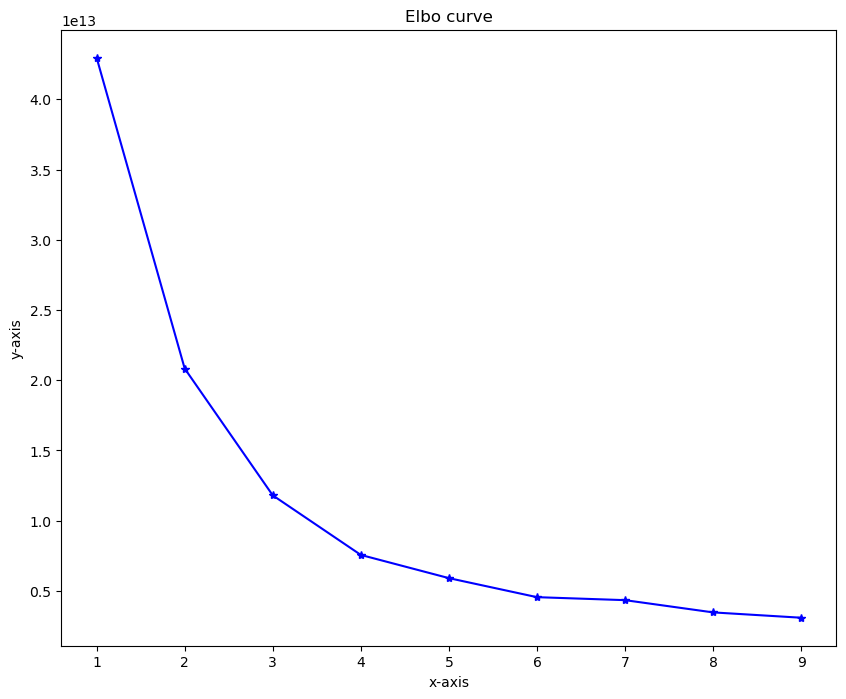

In [124]:
# plot elbo curve 
plt.figure(figsize=(10,8))
plt.plot(k_val,wcss, marker="*", color="blue")
plt.title("Elbo curve")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.show()

# KMeans

In [127]:
km = KMeans(n_clusters=3, random_state=42)
y_predicted = km.fit_predict(data2)

In [194]:
data1 = y_predicted

In [199]:
print("Cluster Centers (scaled):")
print(km.cluster_centers_)


Cluster Centers (scaled):
[[1.51935361e+03 1.88000250e+05 2.85322489e+02 3.05516266e+00
  1.00990099e+00 1.02970297e+00 3.60351358e+04 1.76506365e+01
  9.97294201e+02 2.87835926e+00 5.03298303e+03 5.04950495e-01
  6.83168317e-01]
 [2.13938248e+03 3.94621468e+04 1.06846700e+02 1.82541641e+00
  1.01542258e+00 1.00771129e+00 1.25122036e+04 1.01483652e+01
  3.24614744e+02 9.79642196e-01 3.88614374e+03 3.34053054e-01
  8.62739050e-01]
 [9.44040000e+02 6.69585040e+05 5.63880000e+02 3.16000000e+00
  1.02000000e+00 1.06000000e+00 5.04167000e+04 2.03200000e+01
  1.64550000e+03 5.64000000e+00 6.25844000e+03 8.20000000e-01
  2.48000000e+00]]


In [201]:
#display first few rows
print(data.head())

   ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1    28143           0          1          1          1          174   
1    2    19244           0          1          1          1          215   
2    3    41354           0          1          1          1         4123   
3    4    14776           0          1          1          1          500   
4    5    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  \
0            1                  0                0               7000       0   
1            2                  0                0               6968       0   
2            4                  0                0               7034       0   
3            1                  0                0               6952       0   
4           26               2077                4               6935       1   

   cluster  
0        1  
1        1  
2        1 

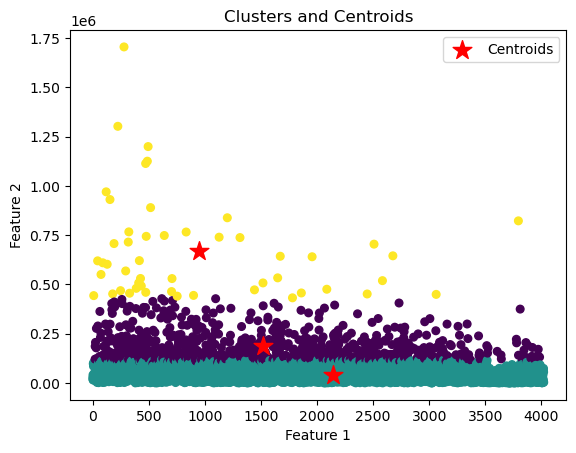

In [203]:
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=y_predicted, cmap='viridis', s=30)  # Use .iloc for index-based access
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=200, c='red', marker='*', label='Centroids')
plt.title('Clusters and Centroids')
plt.xlabel('Feature 1')  # Replace with the actual column name if available
plt.ylabel('Feature 2')  # Replace with the actual column name if available
plt.legend()
plt.show()
